In [17]:
%reload_ext autoreload
%autoreload 2

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

# Fit only one SED

In [19]:
from pyGRBz.pyGRBz import GRB_photoZ

In [20]:
# Load module
photoz = GRB_photoZ(output_dir=os.getenv('pyGRBz_DIR')+'/pyGRBz/results/Tuto/SED/')

In [21]:
# Load the GRB SED stored in data/sed/
photoz.load_data(data_dir='data/sed/',data_name=['GRB050904'])


Observations:
    Name   time_since_burst band  mag  mag_err  zp phot_sys detection telescope
--------- ---------------- ---- ----- ------- --- -------- --------- ---------
GRB050904                1   Ks  20.0    0.07   -       AB         1     isaac
GRB050904                1    H 20.37    0.07   -       AB         1     isaac
GRB050904                1    J  20.7    0.06   -       AB         1     isaac
GRB050904                1    z  21.8     0.2   -       AB         1     fors2
GRB050904                1    I 24.45     0.2   -       AB         1     fors2
GRB050904                1    R  23.9    0.05   -       AB         0     cafos
GRB050904                1    V  24.6    0.05   -       AB         0     laica


Info about data:
    name   type  RA_J2000   DEC_J2000   ... beta_inf beta_X beta_X_sup beta_X_inf
--------- ---- ---------- ------------ ... -------- ------ ---------- ----------
GRB050904  sed 0h54m50.6s +14d05m04.5s ...      0.3    -99        -99        -99



In [22]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
    Name   time_since_burst band  mag  ... ext_mag      flux          flux_err   
                                      ...            microJy         microJy    
--------- ---------------- ---- ----- ... ------- -------------- ---------------
GRB050904                1    V  24.6 ...     0.0  0.52480746025 0.0241682766933
GRB050904                1    R  23.9 ...     0.0            1.0 0.0460517018599
GRB050904                1    I 24.45 ...     0.0 0.602559586074  0.110995577643
GRB050904                1    z  21.8 ...     0.0  6.91830970919   1.27439974441
GRB050904                1    J  20.7 ...     0.0  19.0546071796   1.05299650667
GRB050904                1    H 20.37 ...     0.0  25.8226019063   1.66484466993
GRB050904                1   Ks  20.0 ...     0.0   36.307805477   2.34085072622



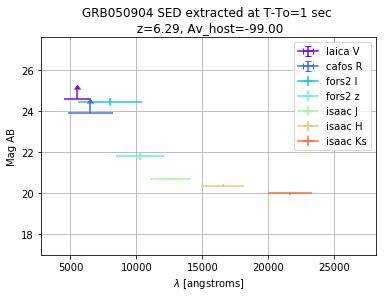


SEDS:
    Name   time_since_burst band  mag  mag_err
--------- ---------------- ---- ----- -------
GRB050904                1    V  24.6    0.05
GRB050904                1    R  23.9    0.05
GRB050904                1    I 24.45     0.2
GRB050904                1    z  21.8     0.2
GRB050904                1    J  20.7    0.06
GRB050904                1    H 20.37    0.07
GRB050904                1   Ks  20.0    0.07



In [23]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [24]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,2],beta=[0,2],norm=[0,10])



Fit 1/1 	 Object: GRB050904 

z_lit: 6.29   Av_lit: -99.00
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 6.200  Av: 0.443  beta: 0.011  Norm: 2.202     chi2: 8.111

Mean Proba: 3.98e-03

Sum Proba: 8.36e+01
Mean acceptance fraction: 0.489


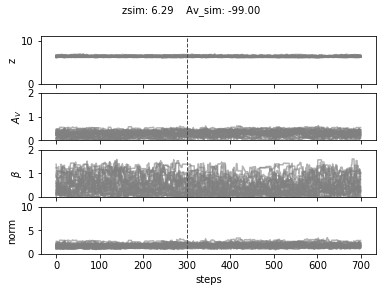

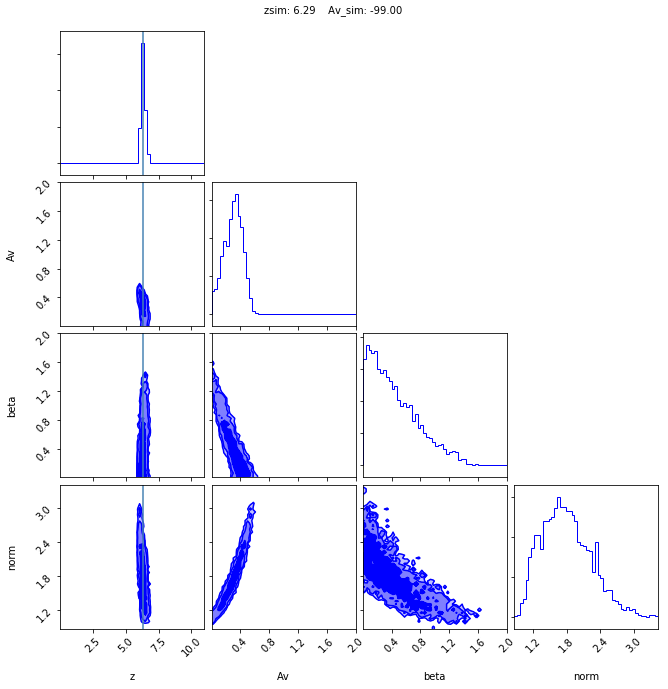


68% - 1 sigma:
z:6.278 +0.199 -0.118 
Av:0.309 +0.117 -0.146 
beta: 0.371 +0.426 -0.262 
norm: 1.751 +0.483 -0.413

95% - 2 sigmas:
z:6.278 +0.382 -0.189 
Av:0.309 +0.207 -0.268 
beta: 0.371 +0.878 -0.355 
norm: 1.751 +0.947 -0.647

99% - 3 sigmas:
z:6.278 +0.516 -0.232 
Av:0.309 +0.268 -0.304 
beta: 0.371 +1.110 -0.369 
norm: 1.751 +1.344 -0.770
median values PDF: 6.278 0.309 0.371 1.751
best fit: 6.200 0.443 0.011 2.202


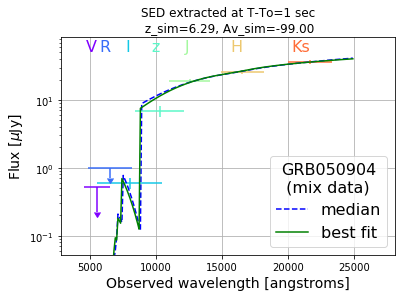


List of GRB not detected: []

None


In [25]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(ext_law='smc',Nthreads=4,sampler_type='ensemble',nwalkers=30,Nsteps1=300,Nsteps2=1000,nburn=300,
      Host_dust=True,Host_gas=False,MW_dust=False,MW_gas=False,DLA=False,igm_att='Meiksin',
      clean_data=False,plot_all=False,plot_deleted=False,priors=priors)

# Fit only one Light Curve

In [26]:
from pyGRBz.pyGRBz import GRB_photoZ

In [27]:
# Load module
photoz = GRB_photoZ(output_dir=os.getenv('pyGRBz_DIR')+'/pyGRBz/results/Tuto/LC/')

In [28]:
# Load the same GRB but with its light curve stored in data/lc/
photoz.load_data(data_dir='data/lc/',data_name=['GRB050904'])


Observations:
    Name   time_since_burst band  mag  mag_err  zp phot_sys detection telescope
--------- ---------------- ---- ----- ------- --- -------- --------- ---------
GRB050904          97200.0   Ks 18.24    0.07   -     vega         1     isaac
GRB050904         185414.4   Ks 19.12    0.07   -     vega         1     isaac
GRB050904          95385.6    H 19.09    0.07   -     vega         1     isaac
GRB050904         183600.0    H 19.96    0.07   -     vega         1     isaac
GRB050904          88905.6    J 19.58    0.14   -     vega         1      nics
GRB050904          93916.8    J 19.92    0.04   -     vega         1     isaac
GRB050904         180748.8    J 20.75    0.07   -     vega         1     isaac
GRB050904         268185.6    J 21.66    0.08   -     vega         1     isaac
GRB050904         359596.8    J 21.91    0.08   -     vega         1     isaac
GRB050904         459388.8    J 22.45    0.19   -     vega         1     isaac
GRB050904         620611.2    J  23.

In [29]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
    Name   time_since_burst band ... ext_mag      flux          flux_err   
                                ...            microJy         microJy    
--------- ---------------- ---- ... ------- -------------- ---------------
GRB050904          89683.2    V ...     0.0 0.828328832356  0.228875714578
GRB050904          84931.2    R ...     0.0 0.727386763233  0.200984390143
GRB050904         104371.2    I ...     0.0 0.556559772441 0.0922698889475
GRB050904          92880.0    I ...     0.0  2.65277227953  0.488658712476
GRB050904          85276.8    I ...     0.0  3.72992389571  0.687077372821
GRB050904          77068.8    I ...     0.0   4.2432631978  0.781637966793
GRB050904          88214.4    z ...     0.0  9.12010839356   2.09998256335
GRB050904         108000.0    z ...     0.0  6.91830970919   1.08323978275
GRB050904         359596.8    J ...     0.0  2.71779391233  0.200254455948
GRB050904          93916.8    J ...     0.0  16.9909053858  0.625968087325
GRB0509

FCN = 0.29595700031551553 
 TOTAL NCALL = 46 
 NCALLS = 46 
 
 
 EDM = 2.2277053992694917e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,4.24326,1,0,0,,,FIXED
2,t0,77068.8,1,0,0,0.0,,FIXED
3,norm,1.0344,0.171119,0,0,0.1,10.0,
4,alpha,2.48554,1.31683,0,0,-10.0,10.0,


Valid Minimum: True 
Is the covariance matrix accurate: True


FCN = 2.7462388857320538e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 2.7124020749851557e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,0.727387,1,0,0,,,FIXED
2,t0,84931.2,1,0,0,0.0,,FIXED
3,norm,1,0.275876,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 5.7910918763828896e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 6.254547618112883e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,0.55656,1,0,0,,,FIXED
2,t0,104371,1,0,0,0.0,,FIXED
3,norm,1,0.165692,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 6.050534480646856e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 7.012018532602871e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,6.91831,1,0,0,,,FIXED
2,t0,108000,1,0,0,0.0,,FIXED
3,norm,1,0.156497,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 7.518182010726127e-05 
 TOTAL NCALL = 41 
 NCALLS = 41 
 
 
 EDM = 7.517213798787162e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,23.7913,1,0,0,,,FIXED
2,t0,95385.6,1,0,0,0.0,,FIXED
3,norm,0.999636,0.0644781,0,0,0.1,10.0,
4,alpha,1.22247,0.139225,0,0,-10.0,10.0,


Valid Minimum: True 
Is the covariance matrix accurate: True


FCN = 11.128835703531916 
 TOTAL NCALL = 49 
 NCALLS = 49 
 
 
 EDM = 1.904499920011275e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,16.9909,1,0,0,,,FIXED
2,t0,93916.8,1,0,0,0.0,,FIXED
3,norm,1.01826,0.0354001,0,0,0.1,10.0,
4,alpha,1.44438,0.0457659,0,0,-10.0,10.0,


Valid Minimum: True 
Is the covariance matrix accurate: True


FCN = 7.495564687872277e-08 
 TOTAL NCALL = 41 
 NCALLS = 41 
 
 
 EDM = 7.495464077623971e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,33.833,1,0,0,,,FIXED
2,t0,97200,1,0,0,0.0,,FIXED
3,norm,1.00001,0.0644655,0,0,0.1,10.0,
4,alpha,1.25501,0.141171,0,0,-10.0,10.0,


Valid Minimum: True 
Is the covariance matrix accurate: True


FCN = 2.1176956405911966e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 2.712402102509415e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,0.828329,1,0,0,,,FIXED
2,t0,89683.2,1,0,0,0.0,,FIXED
3,norm,1,0.275876,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 1.325268139417571e-29 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 1.0339150314995768e-15 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,22.7052,1,0,0,,,FIXED
2,t0,88905.6,1,0,0,0.0,,FIXED
3,norm,1,0.128901,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 2.8621279110072956e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 3.2423574007826466e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,9.12011,1,0,0,,,FIXED
2,t0,88214.4,1,0,0,0.0,,FIXED
3,norm,1,0.230007,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False
   name   telescope band ...     alpha        t0           chi2      
--------- --------- ---- ... ------------- -------- -----------------
GRB050904     cafos    I ... 2.48553836155  77068.8    0.295957000316
GRB050904     cafos    R ...           1.0  84931.2 2.74623888573e-30
GRB050904     fors2    I ...           1.0 104371.2 5.79109187638e-30
GRB050904     fors2    z ...           1.0 108000.0 6.05053448065e-30
GRB050904     isaac    H ... 1.22246857581  95385.6 7.51818201073e-05
GRB050904     isaac    J ... 1.44437822121  93916.8     11.1288357035
GRB050904     isaac   Ks ...  1.2550115861  97200.0 7.49556468787e-08
GRB050904     laica    V ...           1.0  89683.2 2.11769564059e-30
GRB050904      nics    J ...           1.0  88905.6 1.32526813942e-29
GRB050904       wfc    z ...           1.0  88214.4 2.86212791101e-30


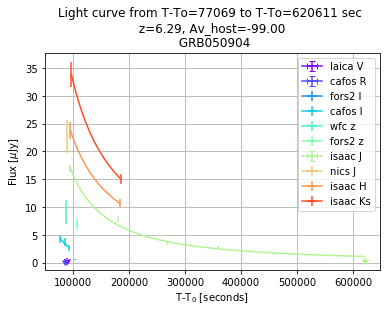

reddest band: Ks


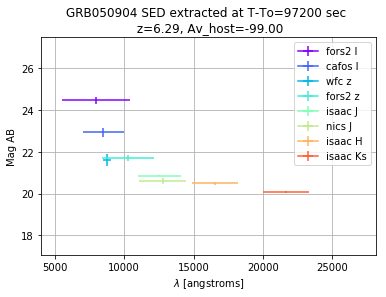


SEDS:
    Name   time_since_burst band      mag          mag_err    
                 s                                           
--------- ---------------- ---- ------------- ---------------
GRB050904          97200.0    I 24.4589344385  0.167632450331
GRB050904          97200.0    I 22.9203067349  0.215205150125
GRB050904          97200.0    z 21.6053169509  0.275465230167
GRB050904          97200.0    z 21.6856062736           0.153
GRB050904          97200.0    J   20.85870143 0.0412816535572
GRB050904          97200.0    J  20.606528198   0.15306122449
GRB050904          97200.0    H 20.4843583874  0.071657250975
GRB050904          97200.0   Ks 20.0766343713 0.0699989717181



In [30]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [31]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,2],beta=[0,2],norm=[0,10])



Fit 1/1 	 Object: GRB050904 

z_lit: 6.29   Av_lit: -99.00
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 6.141  Av: 0.485  beta: 0.004  Norm: 2.381     chi2: 14.664

Mean Proba: 1.46e-04

Sum Proba: 3.06e+00
Mean acceptance fraction: 0.484


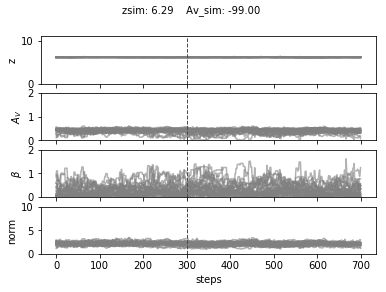

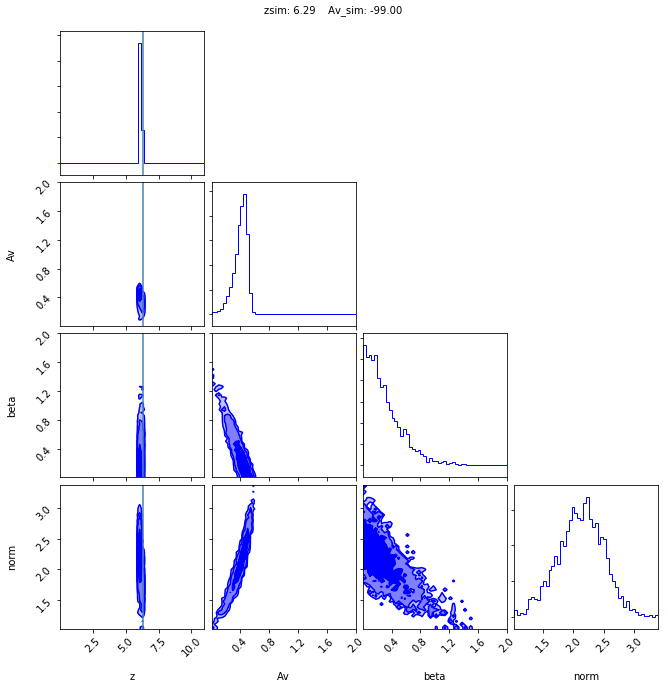


68% - 1 sigma:
z:6.131 +0.054 -0.041 
Av:0.414 +0.070 -0.104 
beta: 0.237 +0.309 -0.169 
norm: 2.123 +0.362 -0.395

95% - 2 sigmas:
z:6.131 +0.097 -0.056 
Av:0.414 +0.117 -0.245 
beta: 0.237 +0.721 -0.228 
norm: 2.123 +0.676 -0.783

99% - 3 sigmas:
z:6.131 +0.150 -0.110 
Av:0.414 +0.160 -0.394 
beta: 0.237 +1.163 -0.237 
norm: 2.123 +1.059 -1.079
median values PDF: 6.131 0.414 0.237 2.123
best fit: 6.141 0.485 0.004 2.381


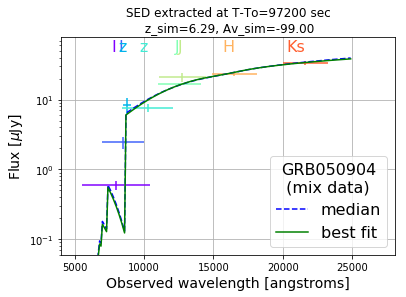


List of GRB not detected: []

None


In [32]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(ext_law='smc',Nthreads=4,sampler_type='ensemble', nwalkers=30,Nsteps1=300,Nsteps2=1000,nburn=300,
      Host_dust=True,Host_gas=False,MW_dust=False,MW_gas=False,DLA=False,igm_att='Meiksin',
      clean_data=False,plot_all=False,plot_deleted=False,priors=priors)

# Run code for multiple Targets

In [33]:
from pyGRBz.pyGRBz import GRB_photoZ

In [34]:
# Load module
photoz = GRB_photoZ(output_dir=os.getenv('pyGRBz_DIR')+'/pyGRBz/results/Tuto/MultipleTargets/')

In [35]:
# Load as many targets as you want. It can be a mix of SEDs and light curves
photoz.load_data(data_dir='data/sed/',           
            data_name=['GRB050904','GRB080825B','GRB080906'])

            #data_name=['GRB050904','GRB080825B','GRB080906','GRB080913','GRB080916C','GRB081228','GRB090423',
            #           'GRB090429B','GRB090516','GRB100518A','GRB110721A','GRB120712A','GRB120922A','GRB130215A',
            #           'GRB130327A','GRB130408A','GRB130514A','GRB130606A','GRB130907A','GRB130925A','GRB131117A',
            #           'GRB140419A','GRB140515A','GRB140518A','GRB140614A','GRB141109A','GRB150120B','GRB150910A',
            #           'GRB151027B','GRB160203A','GRB160327A','GRB160625B'])
            


Observations:
    Name    time_since_burst band  mag  ... phot_sys detection telescope ABcorr
---------- ---------------- ---- ----- ... -------- --------- --------- ------
 GRB050904                1   Ks  20.0 ...       AB         1     isaac     --
 GRB050904                1    H 20.37 ...       AB         1     isaac     --
 GRB050904                1    J  20.7 ...       AB         1     isaac     --
 GRB050904                1    z  21.8 ...       AB         1     fors2     --
 GRB050904                1    I 24.45 ...       AB         1     fors2     --
 GRB050904                1    R  23.9 ...       AB         0     cafos     --
 GRB050904                1    V  24.6 ...       AB         0     laica     --
GRB080825B            25920    g 22.45 ...       AB         1     grond  -99.0
GRB080825B            25920    r 19.91 ...       AB         1     grond  -99.0
GRB080825B            25920    i 18.62 ...       AB         1     grond  -99.0
GRB080825B            25920    z 18.

In [36]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
    Name    time_since_burst band ... ext_mag      flux          flux_err   
                                 ...            microJy         microJy    
---------- ---------------- ---- ... ------- -------------- ---------------
 GRB050904                1    V ...     0.0  0.52480746025 0.0241682766933
 GRB050904                1    R ...     0.0            1.0 0.0460517018599
 GRB050904                1    I ...     0.0 0.602559586074  0.110995577643
 GRB050904                1    z ...     0.0  6.91830970919   1.27439974441
 GRB050904                1    J ...     0.0  19.0546071796   1.05299650667
 GRB050904                1    H ...     0.0  25.8226019063   1.66484466993
 GRB050904                1   Ks ...     0.0   36.307805477   2.34085072622
GRB080825B            25920    g ...     0.0  3.80189396321  0.245117162215
GRB080825B            25920    r ...     0.0  39.4457302075   1.45323440573
GRB080825B            25920    i ...     0.0  129.419584145    4.76799

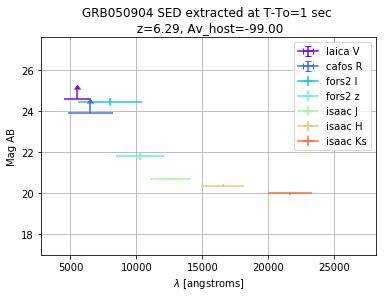

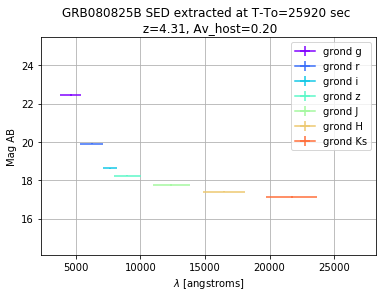

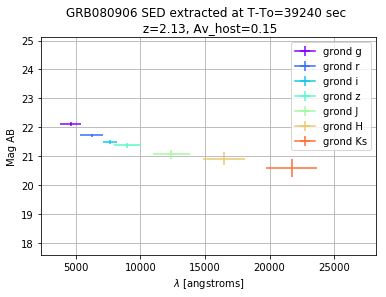


SEDS:
    Name    time_since_burst band      mag      mag_err
---------- ---------------- ---- ------------- -------
 GRB050904                1    V          24.6    0.05
 GRB050904                1    R          23.9    0.05
 GRB050904                1    I         24.45     0.2
 GRB050904                1    z          21.8     0.2
 GRB050904                1    J          20.7    0.06
 GRB050904                1    H         20.37    0.07
 GRB050904                1   Ks          20.0    0.07
GRB080825B            25920    g         22.45    0.07
GRB080825B            25920    r         19.91    0.04
GRB080825B            25920    i         18.62    0.04
GRB080825B            25920    z         18.24    0.04
GRB080825B            25920    J         17.74    0.04
GRB080825B            25920    H         17.41    0.05
GRB080825B            25920   Ks         17.11    0.05
 GRB080906            39240    g         22.11    0.07
 GRB080906            39240    r         21.72    0.05
 G

In [37]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [38]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,2],beta=[0,2],norm=[0,10])



Fit 1/3 	 Object: GRB050904 

z_lit: 6.29   Av_lit: -99.00
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 6.184  Av: 0.439  beta: 0.025  Norm: 2.174     chi2: 8.159

Mean Proba: 4.05e-03

Sum Proba: 8.50e+01
Mean acceptance fraction: 0.479


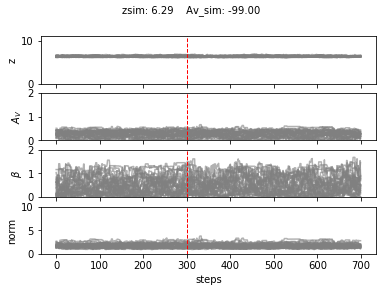

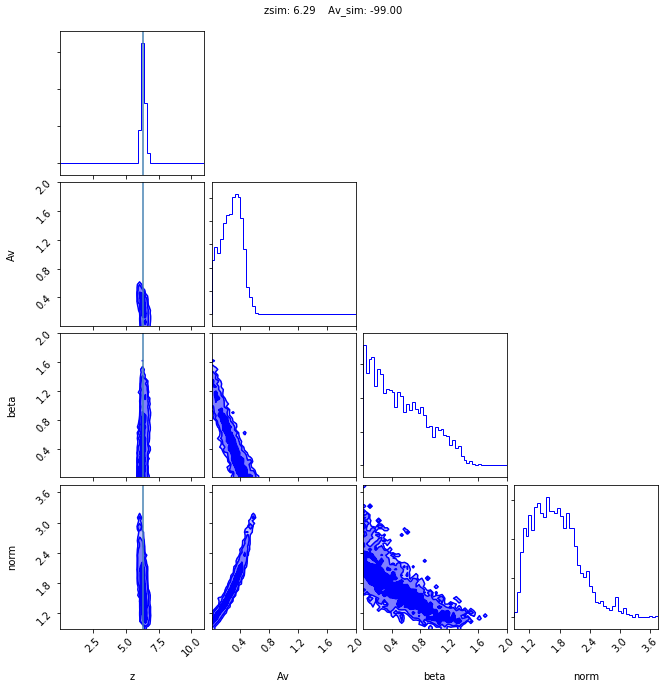


68% - 1 sigma:
z:6.282 +0.206 -0.119 
Av:0.283 +0.130 -0.164 
beta: 0.455 +0.488 -0.332 
norm: 1.667 +0.482 -0.423

95% - 2 sigmas:
z:6.282 +0.371 -0.196 
Av:0.283 +0.234 -0.265 
beta: 0.455 +0.850 -0.439 
norm: 1.667 +1.143 -0.635

99% - 3 sigmas:
z:6.282 +0.520 -0.242 
Av:0.283 +0.306 -0.282 
beta: 0.455 +1.085 -0.454 
norm: 1.667 +1.559 -0.716
median values PDF: 6.282 0.283 0.455 1.667
best fit: 6.184 0.439 0.025 2.174


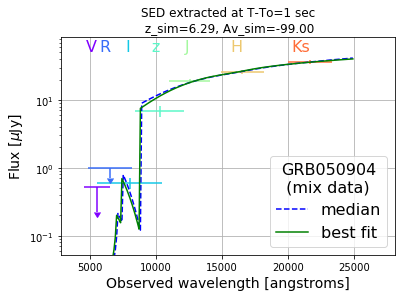



Fit 2/3 	 Object: GRB080825B 

z_lit: 4.31   Av_lit: 0.20
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 4.522  Av: 0.399  beta: 0.124  Norm: 1.676     chi2: 2.915

Mean Proba: 6.06e-02

Sum Proba: 1.27e+03
Mean acceptance fraction: 0.490


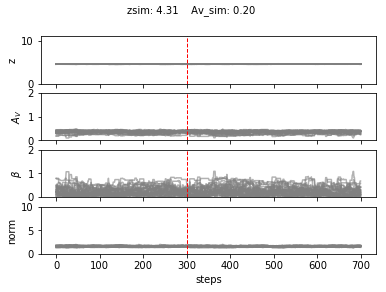

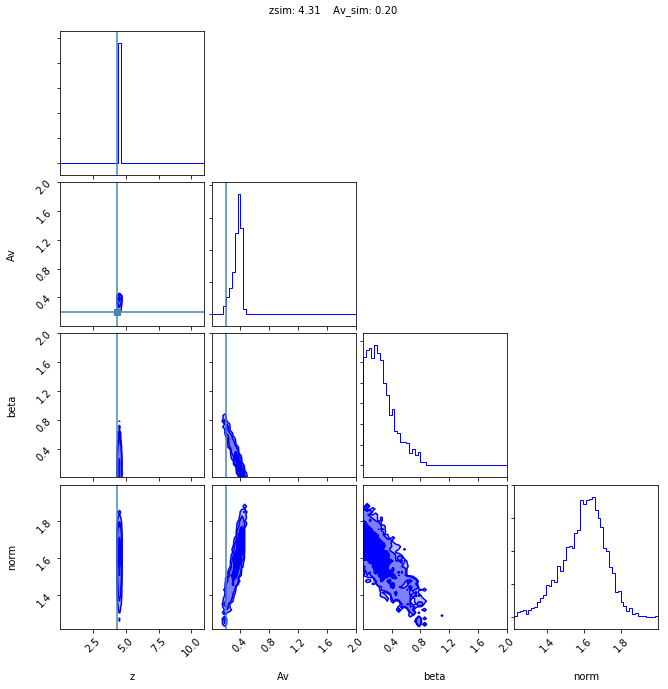


68% - 1 sigma:
z:4.541 +0.052 -0.022 
Av:0.366 +0.043 -0.076 
beta: 0.217 +0.218 -0.145 
norm: 1.607 +0.097 -0.125

95% - 2 sigmas:
z:4.541 +0.067 -0.032 
Av:0.366 +0.067 -0.159 
beta: 0.217 +0.506 -0.207 
norm: 1.607 +0.186 -0.255

99% - 3 sigmas:
z:4.541 +0.082 -0.070 
Av:0.366 +0.092 -0.204 
beta: 0.217 +0.636 -0.216 
norm: 1.607 +0.273 -0.360
median values PDF: 4.541 0.366 0.217 1.607
best fit: 4.522 0.399 0.124 1.676


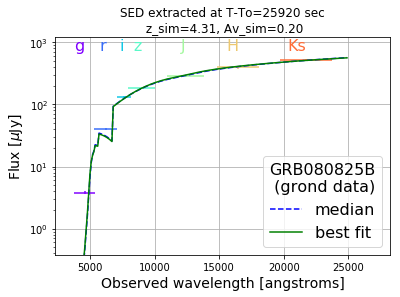



Fit 3/3 	 Object: GRB080906 

z_lit: 2.13   Av_lit: 0.15
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 1.437  Av: 0.256  beta: 0.419  Norm: 1.038     chi2: 0.223

Mean Proba: 3.42e-01

Sum Proba: 7.19e+03
Mean acceptance fraction: 0.400


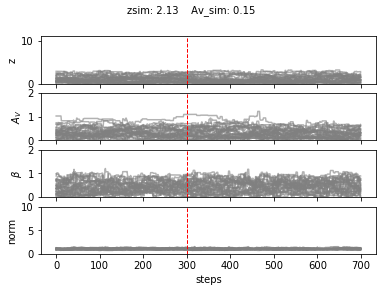

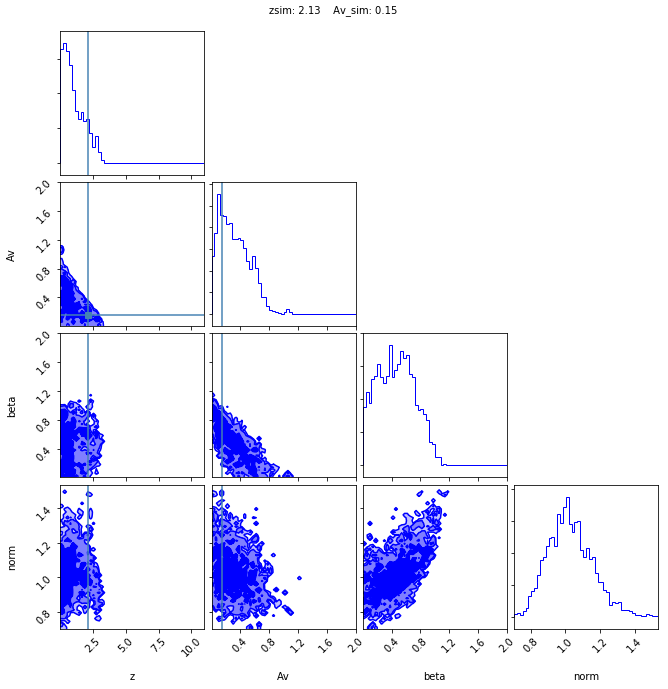


68% - 1 sigma:
z:0.818 +1.149 -0.561 
Av:0.287 +0.268 -0.186 
beta: 0.466 +0.265 -0.286 
norm: 1.016 +0.138 -0.117

95% - 2 sigmas:
z:0.818 +2.000 -0.783 
Av:0.287 +0.465 -0.262 
beta: 0.466 +0.484 -0.434 
norm: 1.016 +0.293 -0.207

99% - 3 sigmas:
z:0.818 +2.336 -0.815 
Av:0.287 +0.809 -0.284 
beta: 0.466 +0.609 -0.465 
norm: 1.016 +0.468 -0.289
median values PDF: 0.818 0.287 0.466 1.016
best fit: 1.437 0.256 0.419 1.038


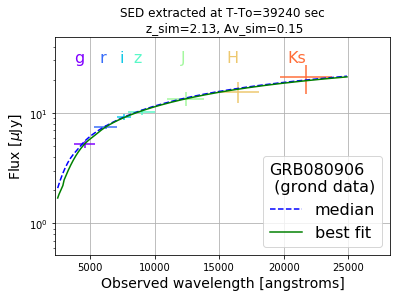


List of GRB not detected: []

None


In [39]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(ext_law='smc',Nthreads=4,sampler_type= 'ensemble',nwalkers=30,Nsteps1=300,Nsteps2=1000,nburn=300,
      Host_dust=True,Host_gas=False,MW_dust=False,MW_gas=False,DLA=False,igm_att='Meiksin',
      clean_data=False,plot_all=False,plot_deleted=False,priors=priors)

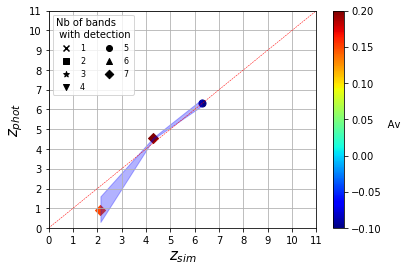

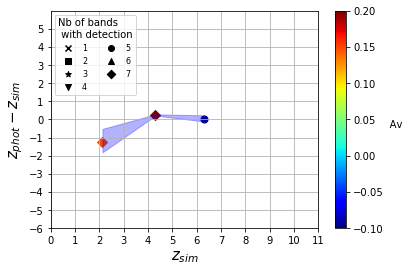

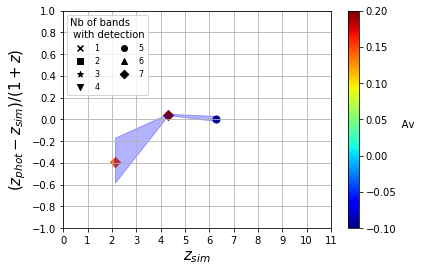

In [56]:
# Plot all redshift estimations together
photoz.plot_zsim_zphot(input_file='best_fits_all_smc',output_suffix='_smc_1sig',sigma=1,
                  input_dir='results/Tuto/MultipleTargets/',output_dir='results/Tuto/MultipleTargets/')